In [1]:
import pandas as pd
import matplotlib.pyplot as plt

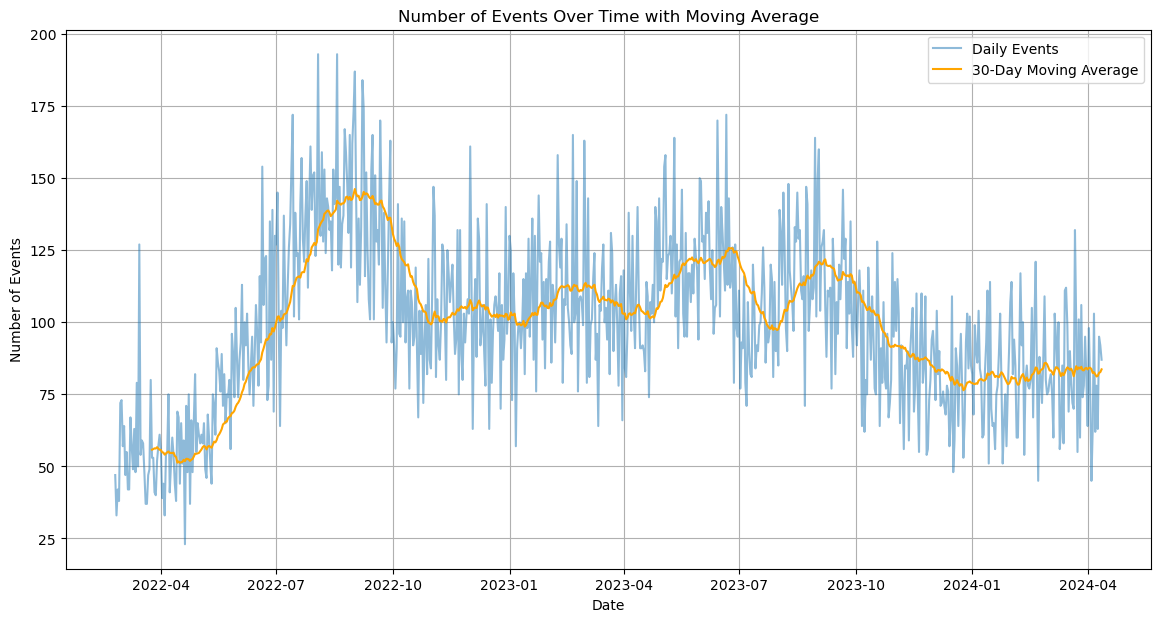

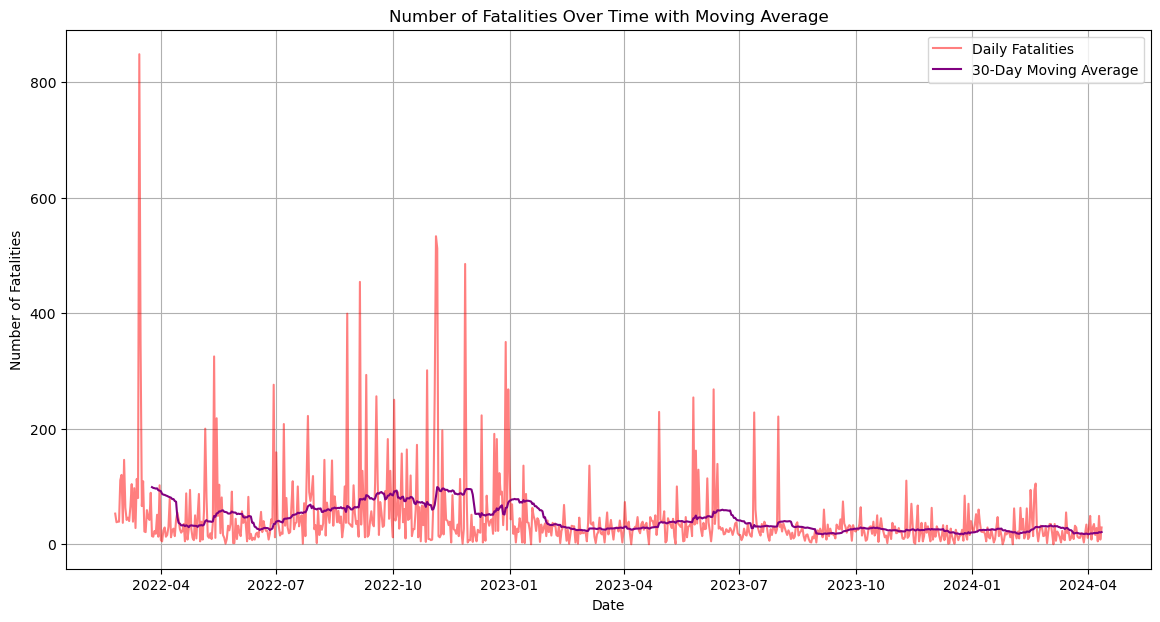

In [3]:
# Loading the data
df = pd.read_csv('../data/cleaned_data.csv')

# Converting 'event_date' to date format
df['event_date'] = pd.to_datetime(df['event_date'])

# Counting events and fatalities by dates
daily_events = df.groupby('event_date').size().reset_index(name='event_count')
daily_fatalities = df.groupby('event_date')['fatalities'].sum().reset_index(name='fatalities')

# Merging the results into one DataFrame
daily_data = pd.merge(daily_events, daily_fatalities, on='event_date')

# Adding a moving average to detect trends
daily_data['event_count_ma'] = daily_data['event_count'].rolling(window=30).mean()
daily_data['fatalities_ma'] = daily_data['fatalities'].rolling(window=30).mean()

# Plotting events with moving average
plt.figure(figsize=(14, 7))
plt.plot(daily_data['event_date'], daily_data['event_count'], alpha=0.5, label='Daily Events')
plt.plot(daily_data['event_date'], daily_data['event_count_ma'], label='30-Day Moving Average', color='orange')
plt.title('Number of Events Over Time with Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

# Plotting fatalities with moving average
plt.figure(figsize=(14, 7))
plt.plot(daily_data['event_date'], daily_data['fatalities'], alpha=0.5, label='Daily Fatalities', color='red')
plt.plot(daily_data['event_date'], daily_data['fatalities_ma'], label='30-Day Moving Average', color='purple')
plt.title('Number of Fatalities Over Time with Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.show()



Top dates by event count:
    event_date  event_count
160 2022-08-03          193
175 2022-08-18          193
189 2022-09-01          187
195 2022-09-07          184
196 2022-09-08          174
Top dates by fatalities:
    event_date  fatalities
19  2022-03-15         848
253 2022-11-04         533
254 2022-11-05         512
276 2022-11-27         485
193 2022-09-05         454


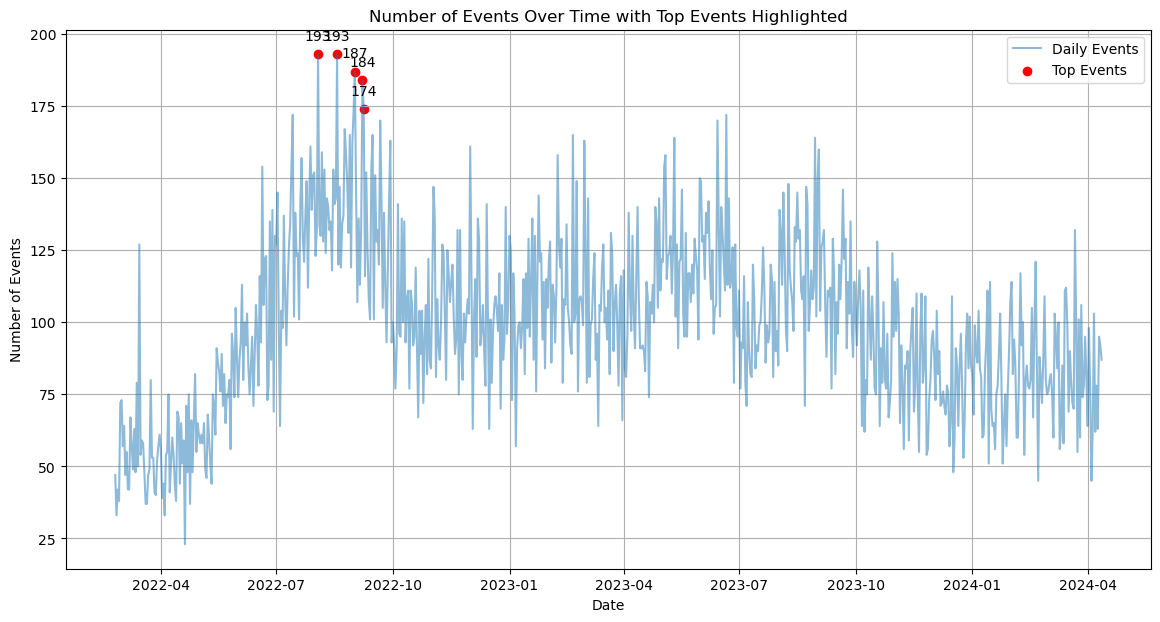

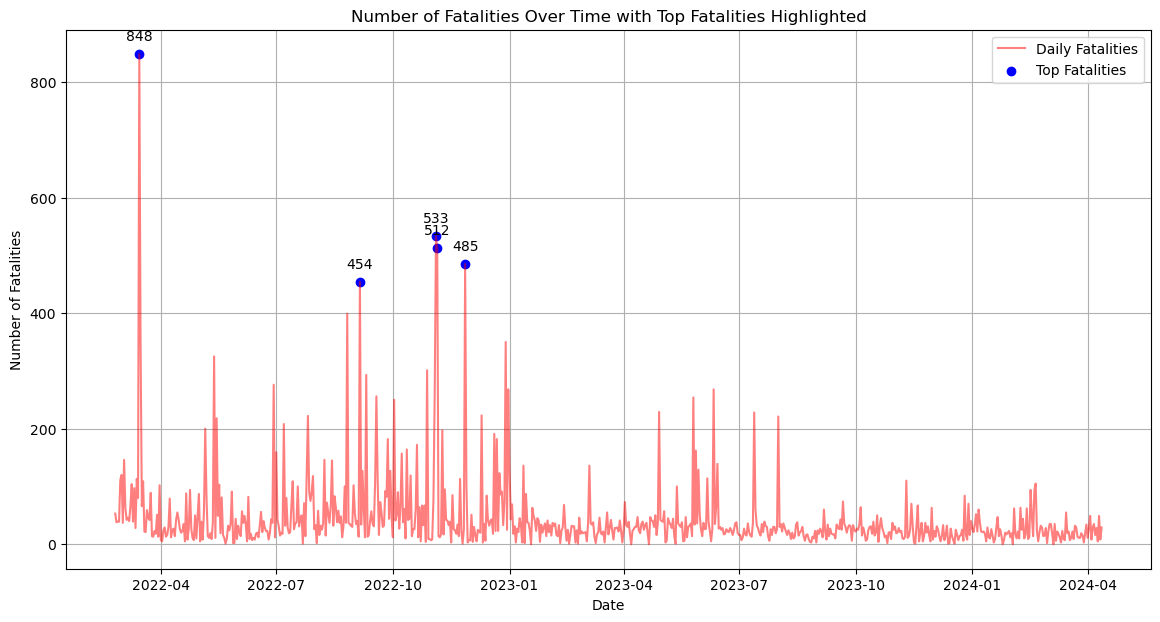

In [4]:
# Determining dates with the maximum number of events
top_event_dates = daily_data.nlargest(5, 'event_count')
print("Top dates by event count:")
print(top_event_dates[['event_date', 'event_count']])

# Determining dates with the maximum number of fatalities
top_fatality_dates = daily_data.nlargest(5, 'fatalities')
print("Top dates by fatalities:")
print(top_fatality_dates[['event_date', 'fatalities']])

# Plotting events with highlighted maximums
plt.figure(figsize=(14, 7))
plt.plot(daily_data['event_date'], daily_data['event_count'], alpha=0.5, label='Daily Events')
plt.scatter(top_event_dates['event_date'], top_event_dates['event_count'], color='red', label='Top Events')
for i, row in top_event_dates.iterrows():
    plt.annotate(f'{row["event_count"]}', (row['event_date'], row['event_count']), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Number of Events Over Time with Top Events Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

# Plotting fatalities with highlighted maximums
plt.figure(figsize=(14, 7))
plt.plot(daily_data['event_date'], daily_data['fatalities'], alpha=0.5, label='Daily Fatalities', color='red')
plt.scatter(top_fatality_dates['event_date'], top_fatality_dates['fatalities'], color='blue', label='Top Fatalities')
for i, row in top_fatality_dates.iterrows():
    plt.annotate(f'{row["fatalities"]}', (row['event_date'], row['fatalities']), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Number of Fatalities Over Time with Top Fatalities Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.show()


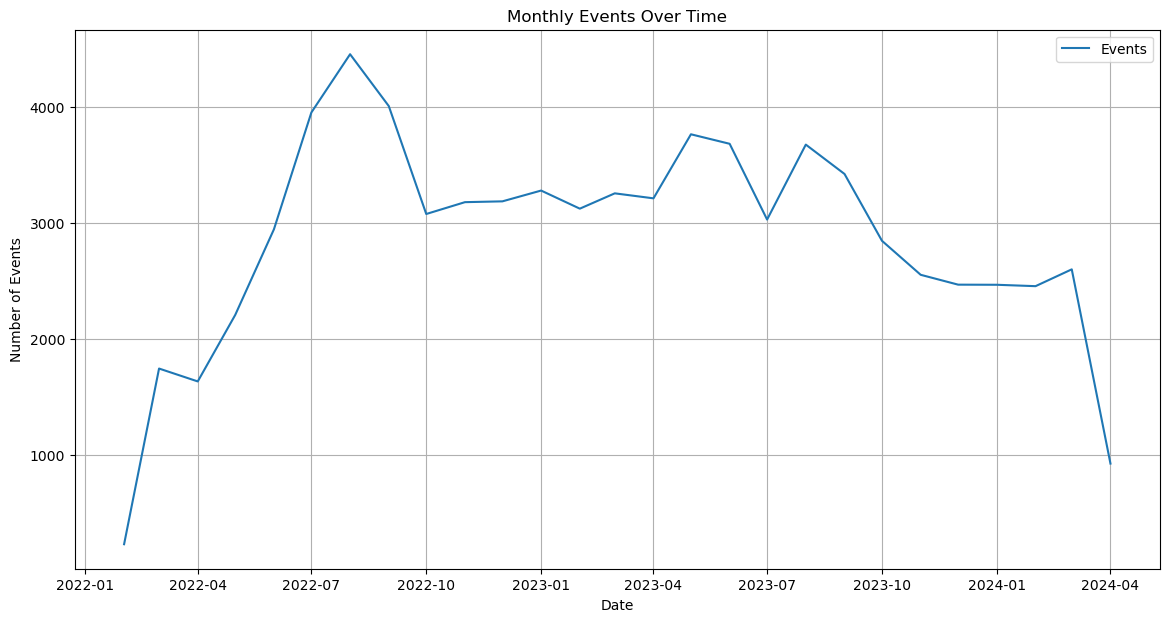

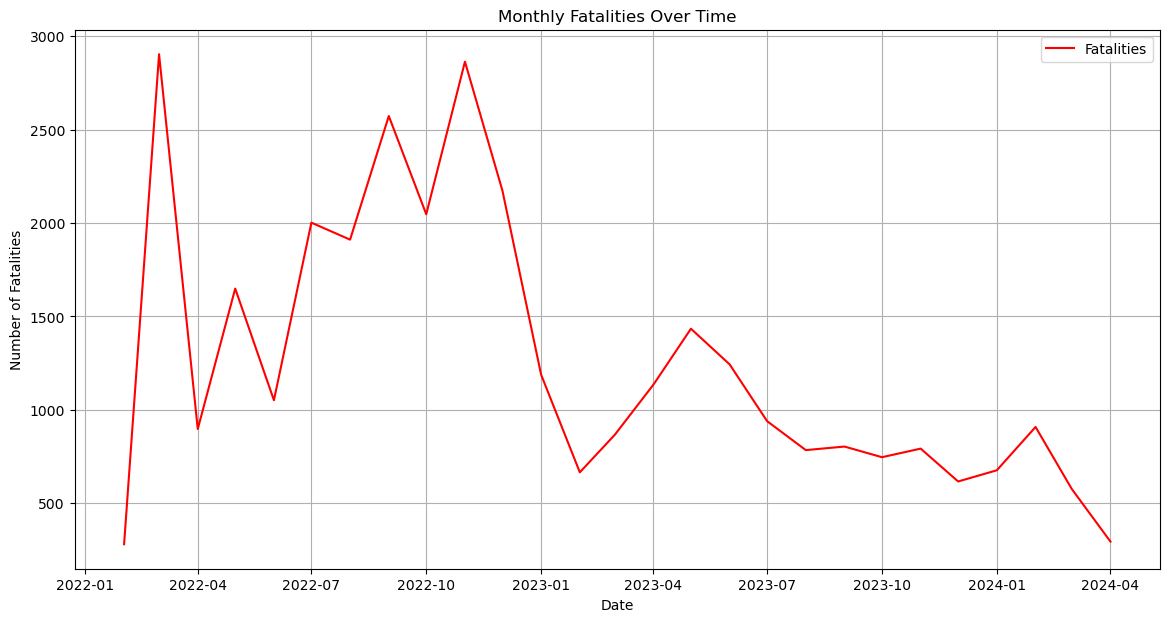

In [5]:
# For studying seasonal fluctuations in events and fatalities, we can break down the data by months and analyze trends.

# Adding month and year to the DataFrame
df['month'] = df['event_date'].dt.month
df['year'] = df['event_date'].dt.year

# Counting events and fatalities by months
monthly_events = df.groupby(['year', 'month']).size().reset_index(name='event_count')
monthly_fatalities = df.groupby(['year', 'month'])['fatalities'].sum().reset_index(name='fatalities')

# Merging the results into one DataFrame
monthly_data = pd.merge(monthly_events, monthly_fatalities, on=['year', 'month'])

# Plotting events by months
plt.figure(figsize=(14, 7))
monthly_data['date'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))
plt.plot(monthly_data['date'], monthly_data['event_count'], label='Events')
plt.title('Monthly Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

# Plotting fatalities by months
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['date'], monthly_data['fatalities'], label='Fatalities', color='red')
plt.title('Monthly Fatalities Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.show()



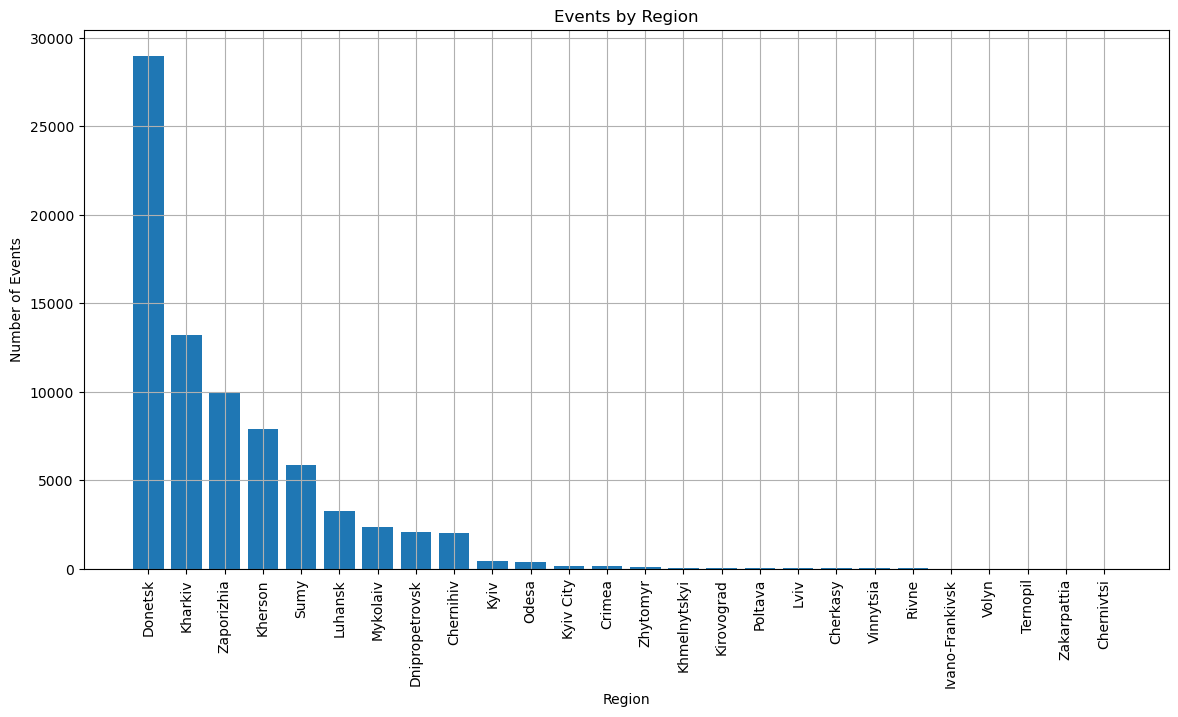

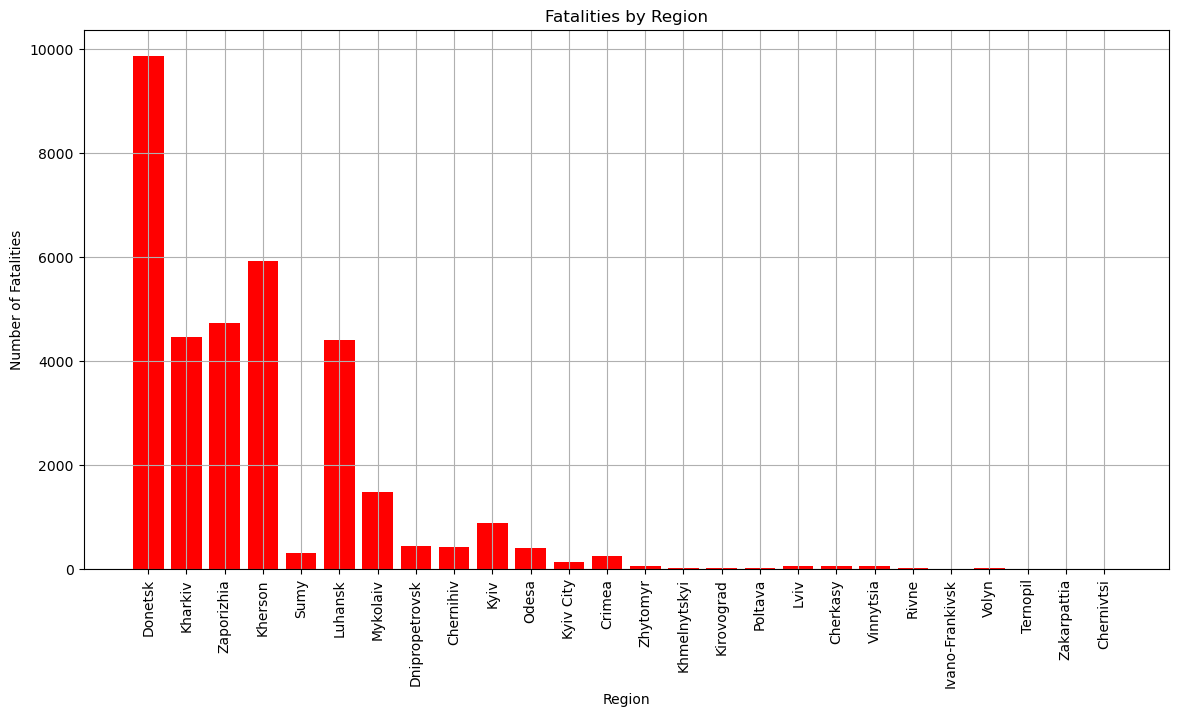

In [6]:
# Analysis by regions
# For analyzing data by regions, we split the data by administrative units and conduct a similar analysis for different regions.

# Counting events and fatalities by regions
regional_events = df.groupby(['region']).size().reset_index(name='event_count')
regional_fatalities = df.groupby(['region'])['fatalities'].sum().reset_index(name='fatalities')

# Merging the results into one DataFrame
regional_data = pd.merge(regional_events, regional_fatalities, on='region')

# Sorting the data in ascending order
regional_data_sorted = regional_data.sort_values(by='event_count', ascending=False)

# Plotting events by regions
plt.figure(figsize=(14, 7))
plt.bar(regional_data_sorted['region'], regional_data_sorted['event_count'])
plt.title('Events by Region')
plt.xlabel('Region')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plotting fatalities by regions
plt.figure(figsize=(14, 7))
plt.bar(regional_data_sorted['region'], regional_data_sorted['fatalities'], color='red')
plt.title('Fatalities by Region')
plt.xlabel('Region')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



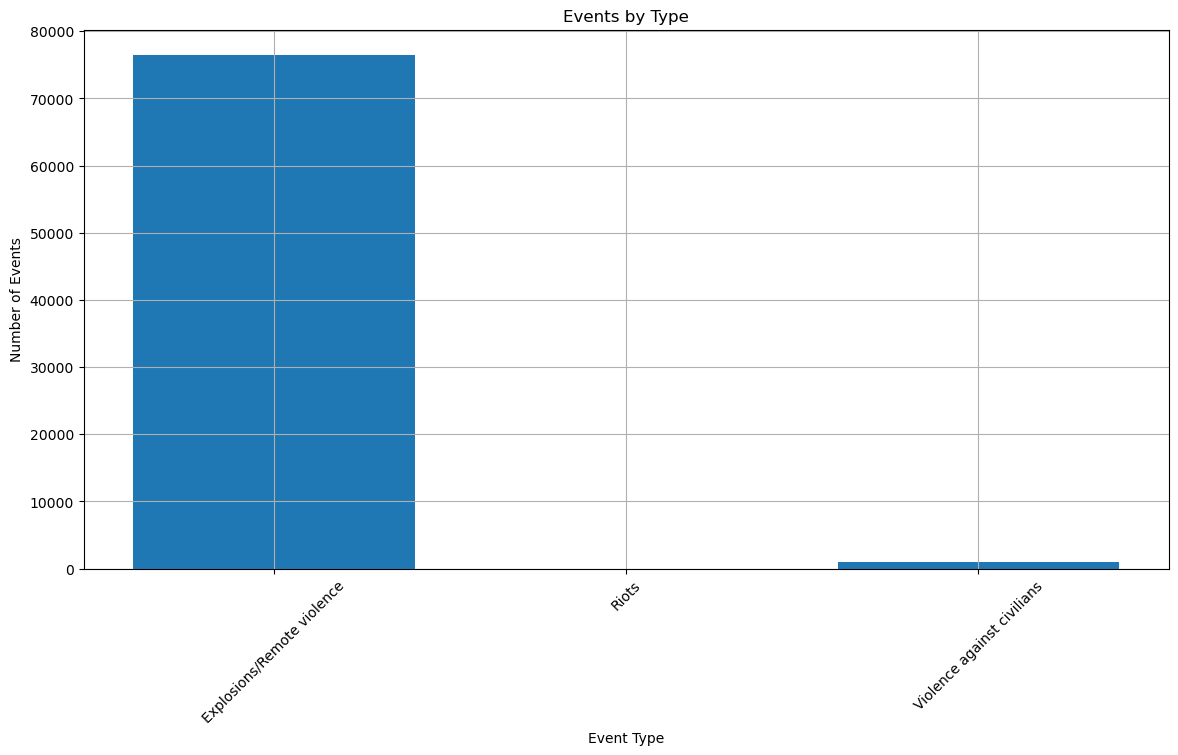

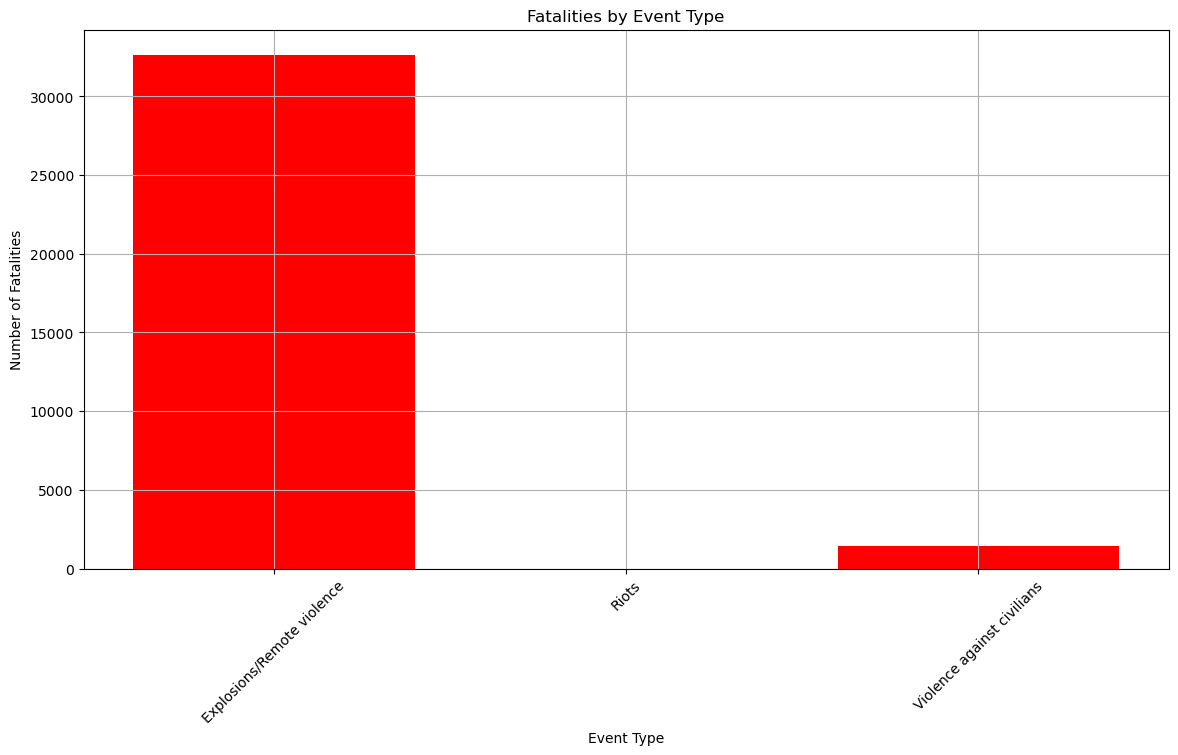

In [7]:
# Analysis of event types
# Comparing different event types to identify the most dangerous ones.

# Counting events and fatalities by event types
event_type_counts = df.groupby('event_type').size().reset_index(name='event_count')
event_type_fatalities = df.groupby('event_type')['fatalities'].sum().reset_index(name='fatalities')

# Merging the results into one DataFrame
event_type_data = pd.merge(event_type_counts, event_type_fatalities, on='event_type')

# Plotting events by event types
plt.figure(figsize=(14, 7))
plt.bar(event_type_data['event_type'], event_type_data['event_count'])
plt.title('Events by Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting fatalities by event types
plt.figure(figsize=(14, 7))
plt.bar(event_type_data['event_type'], event_type_data['fatalities'], color='red')
plt.title('Fatalities by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

